# Project Name – Credit Card Segmentation

## Problem Statement

This case requires trainees to develop a customer segmentation to define
marketing strategy. The sample dataset summarizes the usage behaviour of about 9000
active credit card holders during the last 6 months. The file is at a customer level with
18 behavioural variables.

### Problems should be address

Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:

1-Monthly average purchase and cash advance amount

2-Purchases by type (one-off, installments)

3-Average amount per purchase and cash advance transaction,

4-Limit usage (balance to credit limit ratio),

5-Payments to minimum payments ratio etc.

### Advanced reporting:

1-Use the derived KPIs to gain insight on the customer profiles.

2-Identification of the relationships/ affinities between services.

3-Clustering: Apply a data reduction technique factor analysis for variable reduction technique and 
  a clustering algorithm to reveal the behavioural segments of credit card holders.

4-Identify cluster characterisitics of the cluster using detailed profiling.

5-Provide the strategic insights and implementation of strategies for given set of cluster characteristics.

#### We will use these steps in this Project:

1-Understand the problem statement.

2-Import libraries and dataset.

3-Visualize and explore dataset

4-K-mean clustering

5-Elbow method

6-Silhouette score.

6-Use scikit learn library to impliment 
clustering.

7-apply PCA

8-Data visualization

## Data Set :

credit-card-data.csv

### DATA DICTIONARY:

1-CUST_ID: Credit card holder ID

2-BALANCE: Monthly average balance (based on daily balance averages)

3-BALANCE_FREQUENCY: Ratio of last 12 months with balance

4-PURCHASES: Total purchase amount spent during last 12 months

5-ONEOFF_PURCHASES: Total amount of one-off purchases

6-INSTALLMENTS_PURCHASES: Total amount of installment purchases

7-CASH_ADVANCE: Total cash-advance amount

8-PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)

9-ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases

10-CASHADVANCE FREQUENCY: Cash-Advance frequency

11-AVERAGE_PURCHASE_TRX: Average amount per purchase transaction

12-CASH_ADVANCE_TRX: Average amount per cash-advance transaction

13-PURCHASES_TRX: Average amount per purchase transaction

14-CREDIT_LIMIT: Credit limit

15-PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period

16-MINIMUM_PAYMENTS: Total minimum payments due in the period.

17-PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance

18-TENURE: Number of months as a customer

## Importing The Libraries

In [1]:
 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Working directory
os.chdir("C:/Users/prashant/OneDrive/Desktop/Edwisor/Projects/Project 2 (Credit Card Segmentation-Jitendra)")

In [3]:
os.getcwd()

'C:\\Users\\prashant\\OneDrive\\Desktop\\Edwisor\\Projects\\Project 2 (Credit Card Segmentation-Jitendra)'

In [4]:
#Importing Data
dir = 'C:\\Users\\prashant\\OneDrive\\Desktop\\Edwisor\\Projects\\Project 2 (Credit Card Segmentation-Jitendra)'
df = pd.read_csv(os.path.join(dir, 'credit-card-data.csv'))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Load Data
CCardData = pd.read_csv("credit-card-data.csv")

In [6]:
CCardData

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [7]:
#Shape
print(CCardData.shape)

(8950, 18)


In [8]:
#columns
print("Columns", CCardData.columns)

Columns Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [9]:
#Type of DataFrame
print(type(CCardData))

<class 'pandas.core.frame.DataFrame'>


In [10]:
#unique values in dataset
CCardData.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [11]:
# Intital descriptive analysis of data.
CCardData.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Missing Value Analysis

In [12]:
# dataset with null value
CCardData.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Note-:  There are missing values in CREDIT_LIMIT and MINIMUM_PAYMENT so we are imputing them with median.

In [13]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we need to remove with median.
CCardData.loc[(CCardData['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=CCardData['MINIMUM_PAYMENTS'].median()

CCardData.loc[(CCardData['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=CCardData['CREDIT_LIMIT'].median()


### Missing Value Analysis again

In [14]:
CCardData.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

No more missing value found

# Outliers Analysis

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

In [15]:
#Check duplicate entries in dataset
CCardData.duplicated().sum()

0

In [16]:
#CUST_ID has data types object, so we need drop it.
CCardData.drop('CUST_ID', axis=1, inplace=True)

In [17]:
#Shape
print(CCardData.shape)

(8950, 17)


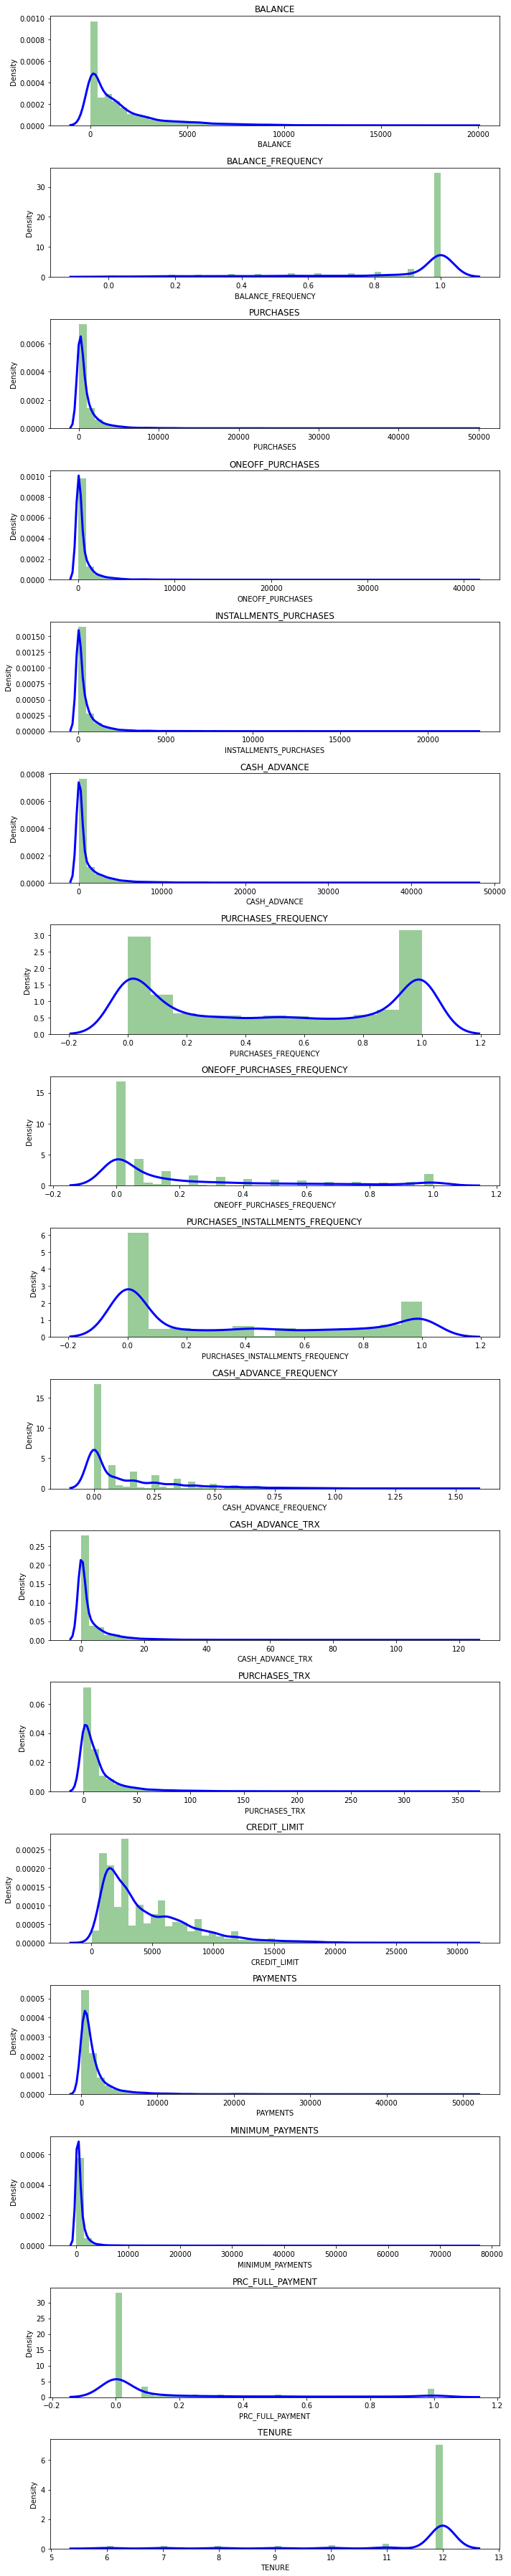

In [18]:
#Distplot is combination of matplotlib.his fucntion  & seaborn kdeplot
#KDE is kernel density estimate 
#KDE is for visualising probability of density of a continous variable

from matplotlib.pyplot import figure

plt.figure(figsize=(10,50))
for i in range(len(CCardData.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(CCardData[CCardData.columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
    plt.title(CCardData.columns[i])
    
plt.tight_layout()

<AxesSubplot:>

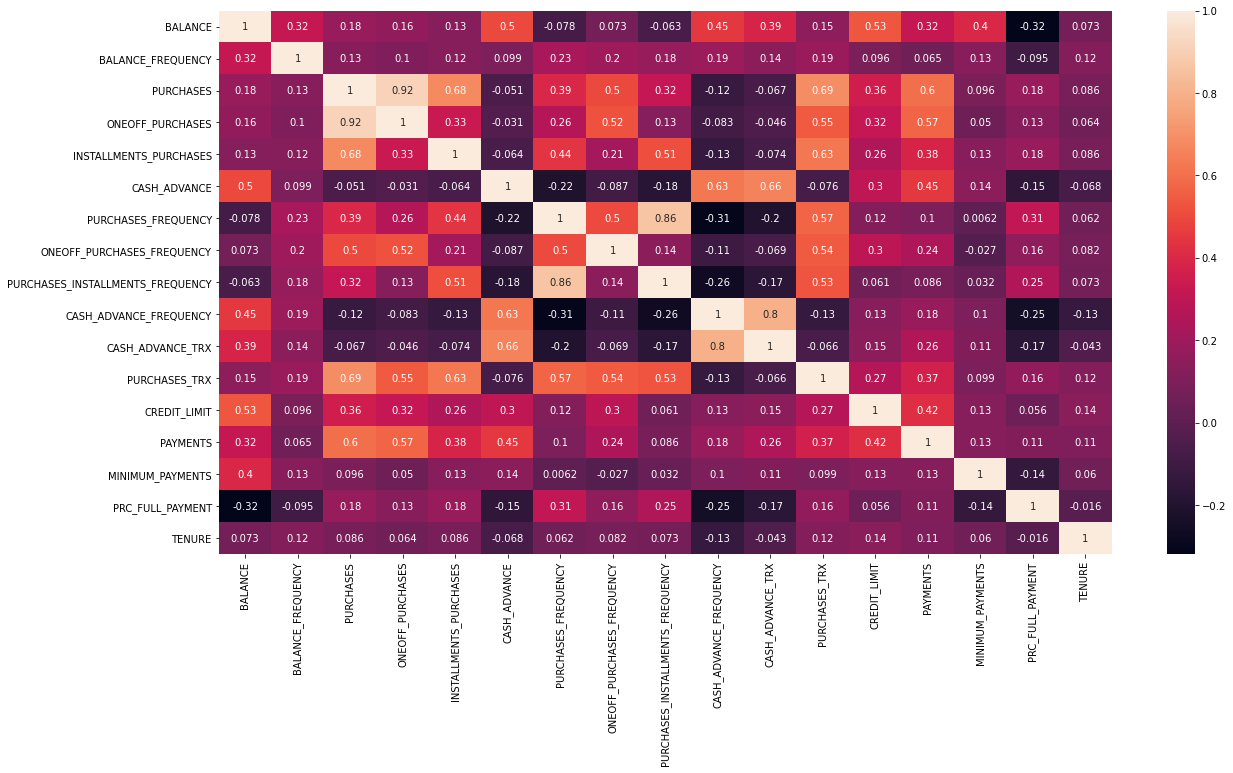

In [19]:
#Correlation matrix between features 

from matplotlib.pyplot import figure
f, ax = plt.subplots(figsize=(20, 10))

correlations = CCardData.corr()

sns.heatmap(correlations,annot=True)

### Data Normalization

In [20]:
#scale data

scaler = StandardScaler() 
CCardData_s = scaler.fit_transform(CCardData)

In [21]:
# Normalizing the Data 
normalized_df = normalize(CCardData_s) 
  

normalized_df = pd.DataFrame(normalized_df)

In [22]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head(2)

,P1,P2
0,-0.490443,-0.679237
1,-0.518542,0.545285


In [23]:
CCardData_s.shape

(8950, 17)

In [24]:
CCardData_s

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

# K-Means Algorithams

## Elbow Method

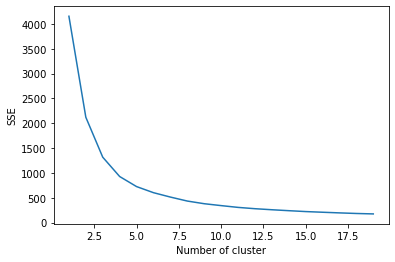

In [25]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

couldn`t find the elbow point of the curve, so we should use silhouette score.

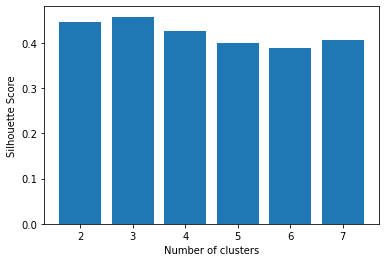

In [26]:
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

Graph showing highest silhouette score is 3.

#  Apply kmeans method

In [27]:
kmean= KMeans(3)
kmean.fit(CCardData_s)
label = kmean.labels_

In [28]:
label.shape

(8950,)

In [29]:
label.max()

2

In [30]:
label.min()

0

In [31]:

clusters=pd.concat([CCardData, pd.DataFrame({'cluster':label})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


# Visualization

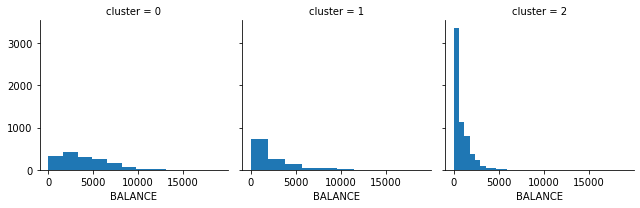

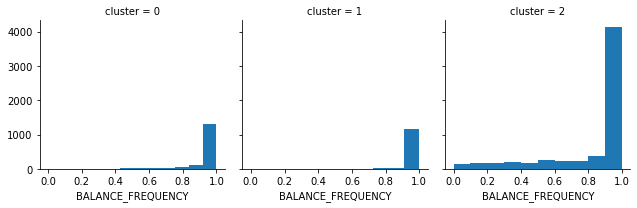

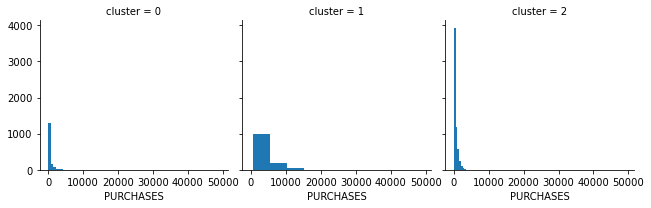

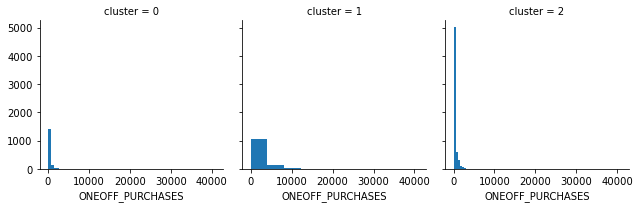

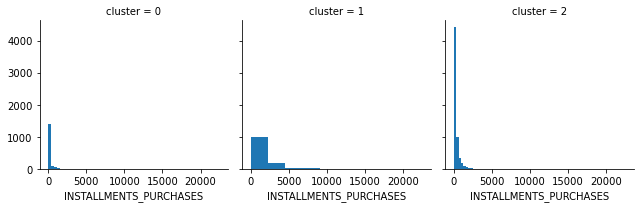

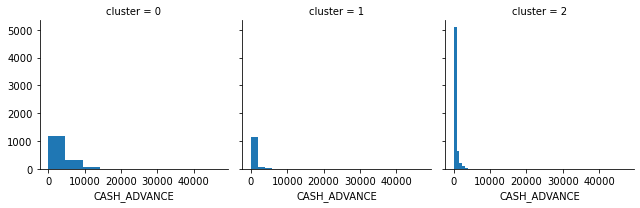

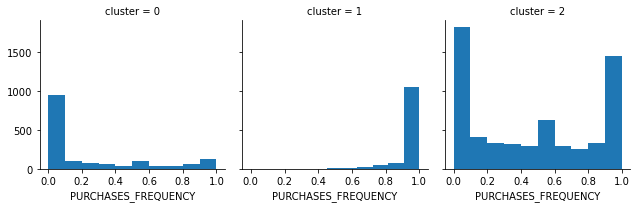

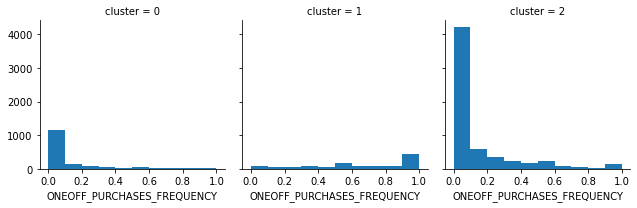

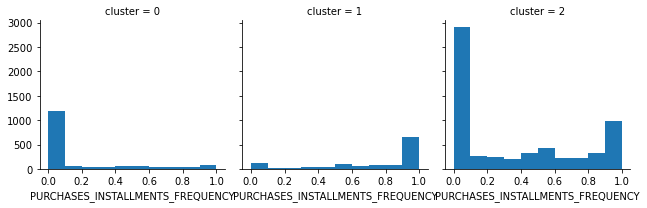

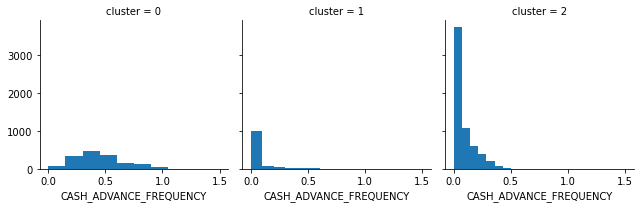

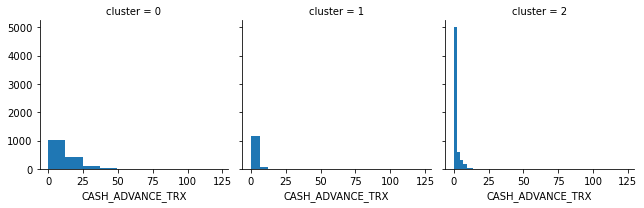

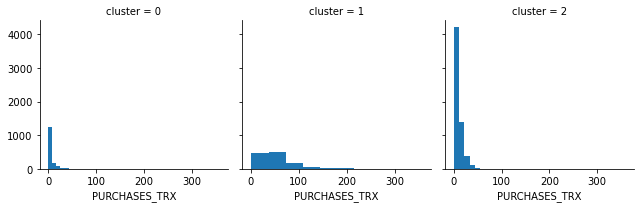

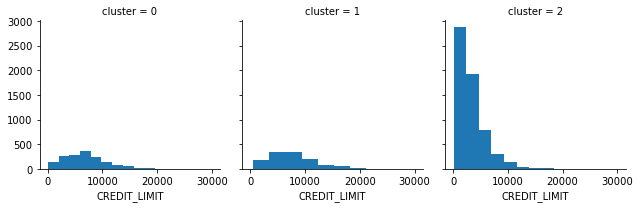

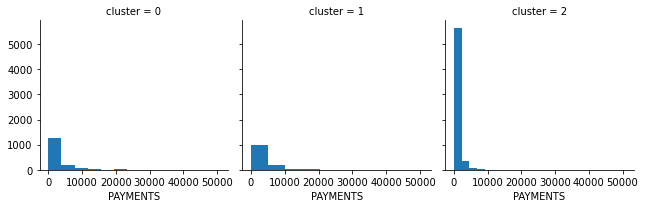

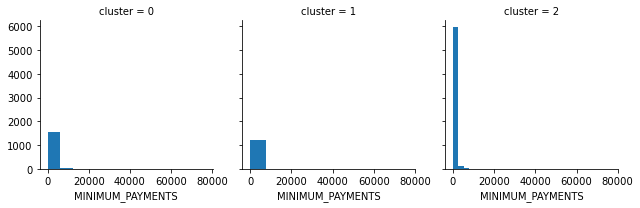

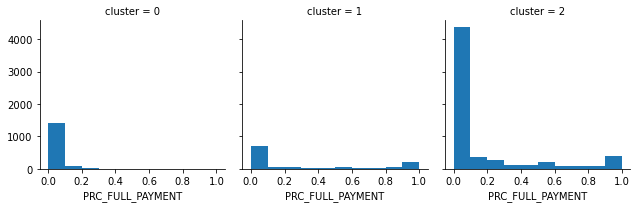

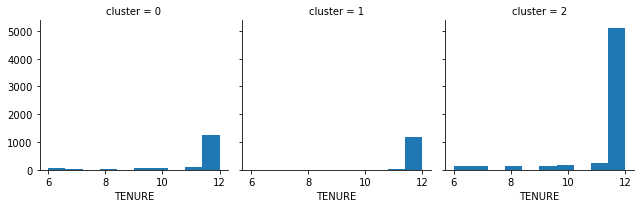

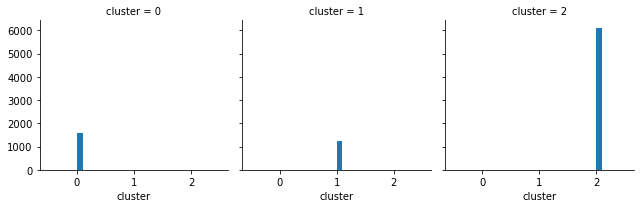

In [32]:
#Plot Histogram
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)
    

In [33]:
clusters['cluster'].value_counts()

2    6119
0    1596
1    1235
Name: cluster, dtype: int64

In [34]:
clusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3989.142419,0.958403,384.528277,248.718133,135.887632,3866.210340,0.232290,0.110942,0.144242,0.447393,12.397870,5.612155,6675.441445,3019.108570,1787.616215,0.033774,11.347744
1,2220.003291,0.981477,4268.520980,2717.828543,1551.178267,458.421147,0.949093,0.668166,0.744584,0.063014,1.528745,56.472065,7733.967611,4151.276172,1220.516917,0.298632,11.923077
2,799.750669,0.835077,505.532394,253.120131,252.733061,330.817885,0.465072,0.132333,0.345145,0.068260,1.209675,8.653865,3271.510637,909.677092,523.213219,0.155750,11.479654


## Cluster Explanation 

### Cluster 0

This customer group indicates a small group of customers who have low balances, small payers (low purchase) with the lowest credit limit.

### Cluster 1

This customer group indicates a large group of customers who have medium balances, payers (high purchase) with the highest credit limit.

### Cluster 2

This customer group indicates a small group of customers who have high balances and cash advances, low purchase frequency with high credit limit. We can assume that this customer segment uses their credit cards as a loan.

# Principal Componant Analysis

In [35]:
#Dimensionality reduction

pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(CCardData_s)
principal_comp


array([[-1.68364919, -1.07223887],
       [-1.13408676,  2.50916935],
       [ 0.96939632, -0.38355638],
       ...,
       [-0.92898484, -1.80805562],
       [-2.33784464, -0.65363243],
       [-0.55802564, -0.40065688]])

In [36]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df

,pca1,pca2
0,-1.683649,-1.072239
1,-1.134087,2.509169
2,0.969396,-0.383556
3,-0.888221,0.004659
4,-1.600021,-0.683796
...,...,...
8945,-0.362571,-2.013442
8946,-0.580810,-1.675676
8947,-0.928985,-1.808056
8948,-2.337845,-0.653632


In [37]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':label})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-1.683649,-1.072239,2
1,-1.134087,2.509169,0
2,0.969396,-0.383556,2
3,-0.888221,0.004659,2
4,-1.600021,-0.683796,2
...,...,...,...
8945,-0.362571,-2.013442,2
8946,-0.580810,-1.675676,2
8947,-0.928985,-1.808056,2
8948,-2.337845,-0.653632,2


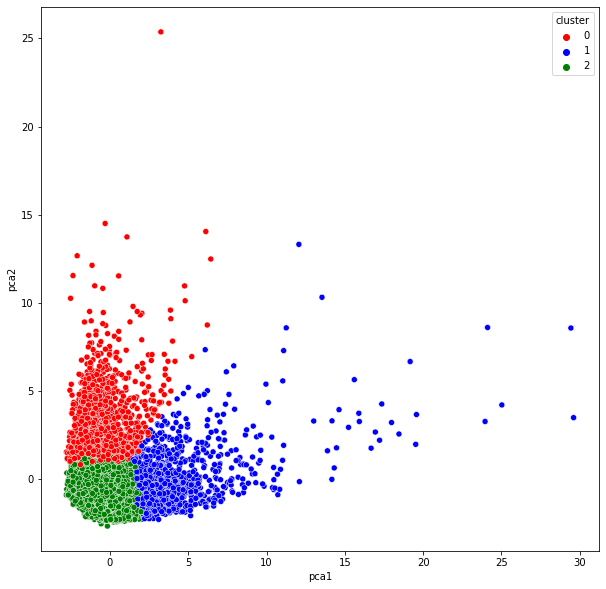

In [38]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df,palette=['red','blue','green'])
plt.show()

In [39]:
#Conclusion
#Cluster 0 : This customer group indicates a large group of customers who have low balances, small payers (low purchase) with the lowest credit limit.
#Cluster 1 : This customer group indicates a small group of customers who have medium balances, payers (high purchase) with the highest credit limit.
#Cluster 2 : This customer group indicates a small group of customers who have high balances and cash advances, low purchase frequency with high credit limit. We can assume that this customer segment uses their credit cards as a loan.